In [2]:
import pandas as pd
import joblib

import shap

import xgboost as xg

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Shap values erstellen

In [3]:
#xgboost = joblib.load('../models/best_model_xgboost.pkl')

In [4]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder

In [5]:
#df = pd.read_csv("../data/lucas_organic_carbon_training_and_test_data_NEW.csv")
#labels = pd.read_csv("../data/lucas_organic_carbon_target.csv")

In [6]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df)
#scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [7]:
#label_encoder = LabelEncoder()
#labels.x = label_encoder.fit_transform(labels.x)

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.2, random_state=42)

## Feature Names extrahieren

In [9]:
#fnames = df.columns.to_list()
#fnames

## Explainer erstellen und speichern

In [10]:
#explainer = shap.TreeExplainer(xgboost, feature_names=fnames)
#explanation = explainer(X_train)

In [11]:
#joblib.dump(explanation, './saved_values/xgboost-shapley_values')

# Plot values

### Erklärungen

Die Explanation ist ein 3 dimensionales Array, aufgebaut in (samples, values, classes), also (nach dem Kürzen) zu allen 7916 samples jeweils 20 values (hier diese Wellenlängen) und zu jeder Wellenlänge 5 Werte (die fünf Kategorien very_low, high etc.).

Das Kürzen bzw. slicen von der Explanation funktioniert wie folgt: man kann in den ekigen Klammern zu allen drei Dimensionen den Start- und End-Index angeben: explanation[start:end, start:end, start:end]
Default ist: start = 0 und end= das Maximum
Das heißt, wenn man explanation[:,:,:] schreibt, bedeutet das dasselbe wie explanation[0:7916,0:20,0:5], also das gesamte array.
Wenn man nur die ersten 20 Wellenlängen anschauen will, schreibt man: explanation[:,:20,:]

In den Plots kann man nicht einfach so alles Kategorien zusammen plotten. Beim Beeswarm geht das zum Beispiel nicht. Da muss man sich bei x für eine Kategorie entscheiden: explanation[:,:20,x]

### Offene Fragen / Todos
1. Ist die Explanation richtig gekürzt? Also sind die ersten 20 Wellenlängen auch die 20 wichtigsten?
    
    
    Nein, beim Durchprobieren zeigt sich, dass es auch später wichtigere gibt.
    Man könnte aus der ungekürzten explanation die wichtigen Wellenlängen rausberechnen oder zufällig x Wellenlängen rausziehen. 
2. Wie kann man in den Plots die Features richtig benennen? (Also dass da die entsprechenden Wellenlängen stehen.)


    Bei Erstellung der shapley_values muss der feature Name mit angegeben werden.
3. Welche Kategorie von 0,1,2,3,4 ist welche? Ist das sortiert nach 0=very_high, 1=high, 2=moderate, 3=low, 4=very_low?
    
    
    korrekt zugeordnet
4. Wie kann man im Summary plot die Kategorien mit plotten?
5. Allgemein, wie kann man die Values anschaulich plotten?


In [18]:
explanation = joblib.load("./saved_values/xgboost-shapley_values")
explanation.shape
#explanation

(7916, 4000, 5)

## Values plotten

In [17]:
shap.plots.beeswarm(explanation[:,:200,4], order=explanation.abs.max(0))

TypeError: only integer scalar arrays can be converted to a scalar index

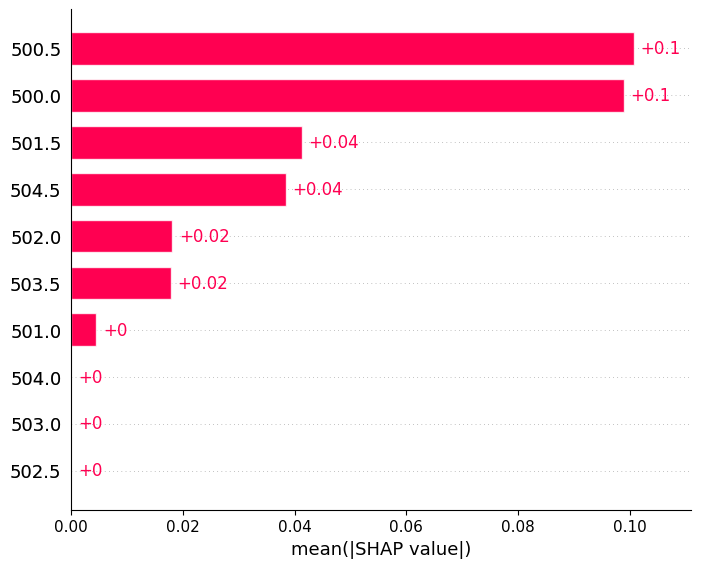

In [14]:
shap.plots.bar(explanation[:,:10,3])